In [ ]:
#Ignore all kinds of warnings
import warnings
warnings.filterwarnings('ignore')

##Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score ,f1_score, confusion_matrix 

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_predict, KFold

from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from itertools import product

##Loading Data
Defining header for each column

In [ ]:
# Load data
df = pd.read_csv(filepath_or_buffer="processed.cleveland.data",header=None)



df.columns = ['age', 'sex', 'cp', 
                   'trestbps', 'chol', 'fbs', 
                   'restecg','thalach','exang','oldpeak', 
                   'slope', 'ca' , 'thal' ,'num']

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Replace all instances of "?" with NaNs
for col in df.columns:
    df[col] = df[col].replace("?", np.nan)

# Drop rows with missing values
df = df.dropna()


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [ ]:
df.shape

(297, 14)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Axes: title={'center': 'Category Distribution'}, xlabel='num'>

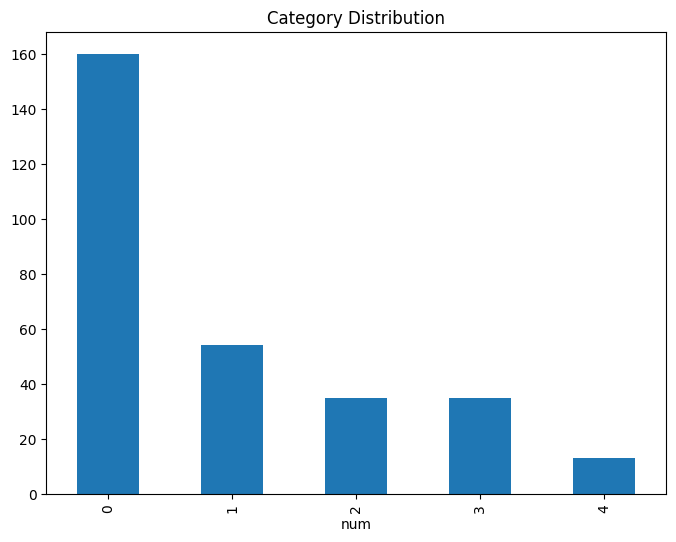

In [ ]:
# Group cleaned DataFrame by a column
grouped_df = df.groupby('num')

# Illustrate the categories
grouped_df.size().plot(kind='bar', figsize=(8, 6), title='Category Distribution')

In [ ]:
# seperate input parameters and output parameter
input_parameters = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg','thalach','exang','oldpeak','slope', 'ca' , 'thal']
output_parameter = ['num']

In [ ]:
x=df[input_parameters]
y= df[output_parameter]

In [ ]:
## Define oversampler
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE oversampler
oversampler = SMOTE(random_state=42)

# Resample the data to balance the classes
X, Y = oversampler.fit_resample(x, y)



In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# apply ICA to the training data
ica = FastICA(n_components=10)
X_train_ica = ica.fit_transform(X_train)

# apply ICA to the test data
X_test_ica = ica.transform(X_test)

In [ ]:
# get the number of features in the dataset
num_features = df.shape[1] - 1

# get the number of unique class labels
num_classes = len(df['num'].unique())

# calculate the maximum number of components allowed by LDA
max_components = min(num_features, num_classes - 1)


print(max_components)

4


In [ ]:
# apply LDA to the training data
lda = LinearDiscriminantAnalysis(n_components = max_components)
X_train_lda = lda.fit_transform(X_train, y_train)

# apply LDA to the test data
X_test_lda = lda.transform(X_test)

In [ ]:
##SVM with hyper_parameters without reduction and 10k fold cross-validation
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

# Initialize the SVM classifier
svm_clf = svm.SVC()

# Define the grid search cross-validation strategy
cv = GridSearchCV(svm_clf, param_grid, cv=10)

# Fit the model to the training data using grid search cross-validation
cv.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", cv.best_params_)

# Define the KFold cross-validation strategy
cvkf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit the model to the training data using the best hyperparameters
svm_clf_best = svm.SVC(C=cv.best_params_['C'], gamma=cv.best_params_['gamma'], kernel=cv.best_params_['kernel'])

# Make predictions using 10-fold cross-validation on the training data
y_pred_cv  = cross_val_predict(svm_clf_best, X_train, y_train, cv=cvkf)


# Print the classification report
print("Classification report on training data with 10-fold cross-validation:")
print(classification_report(y_train, y_pred_cv))

# Print the confusion matrix
print("Confusion matrix on training data with 10-fold cross-validation:")
print(confusion_matrix(y_train, y_pred_cv))


Best hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Classification report on training data with 10-fold cross-validation:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       130
           1       0.67      0.76      0.71       124
           2       0.86      0.90      0.88       135
           3       0.83      0.83      0.83       127
           4       0.91      0.94      0.92       124

    accuracy                           0.81       640
   macro avg       0.81      0.81      0.81       640
weighted avg       0.81      0.81      0.81       640

Confusion matrix on training data with 10-fold cross-validation:
[[ 83  25  11   8   3]
 [ 10  94   4  11   5]
 [  3   8 121   1   2]
 [  7  10   3 106   1]
 [  2   4   1   1 116]]


In [ ]:
#SVM with hyper_parameters with reduction(LDA) and 10-fold cross-validation


# Define the KFold cross-validation strategy
cvkf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit the model to the training data using the best hyperparameters
# Best hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
svm_clf_best = svm.SVC(C=100, gamma=0.001, kernel='rbf')

# Make predictions using 10-fold cross-validation on the training data
y_pred_cv  = cross_val_predict(svm_clf_best, X_train_lda, y_train, cv=cvkf)


# Print the classification report
print("Classification report on training data with 10-fold cross-validation:")
print(classification_report(y_train, y_pred_cv))

# Print the confusion matrix
print("Confusion matrix on training data with 10-fold cross-validation:")
print(confusion_matrix(y_train, y_pred_cv))



Classification report on training data with 10-fold cross-validation:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       130
           1       0.46      0.35      0.40       124
           2       0.58      0.53      0.55       135
           3       0.59      0.47      0.52       127
           4       0.64      0.88      0.74       124

    accuracy                           0.62       640
   macro avg       0.60      0.62      0.60       640
weighted avg       0.60      0.62      0.60       640

Confusion matrix on training data with 10-fold cross-validation:
[[110  13   4   0   3]
 [ 37  43  22  12  10]
 [  2  16  72  19  26]
 [  2  21  23  60  21]
 [  0   0   4  11 109]]


In [ ]:
#Random Forests without dimention reduction and 10-fold cross-validation and hyperparameters

# Create the random forest classifier
rf_classifier  = RandomForestClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10)
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

# Train the random forest classifier with the best hyperparameters on the entire training data
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)


# Use 10-fold cross-validation to train the model
kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(best_rf_classifier, X_train, y_train, cv=kf)

# Print the classification report
print("Classification report on training data with 10-fold cross-validation:")
print(classification_report(y_train, y_pred))

# Print the confusion matrix
print("Confusion matrix on training data with 10-fold cross-validation:")
print(confusion_matrix(y_train, y_pred))





Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification report on training data with 10-fold cross-validation:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       130
           1       0.84      0.73      0.78       124
           2       0.87      0.89      0.88       135
           3       0.87      0.86      0.87       127
           4       0.91      0.98      0.94       124

    accuracy                           0.87       640
   macro avg       0.87      0.87      0.87       640
weighted avg       0.87      0.87      0.87       640

Confusion matrix on training data with 10-fold cross-validation:
[[116  10   3   1   0]
 [ 17  90   8   6   3]
 [  3   3 120   7   2]
 [  1   3   7 109   7]
 [  0   1   0   2 121]]


In [ ]:
#Random Forests with ICA dimention reduction and 10-fold cross-validation and hyperparameter

# Create the random forest classifier
rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Use 10-fold cross-validation to train the model
kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf, X_train_ica, y_train, cv=kf)

# Print the classification report
print("Classification report on training data with 10-fold cross-validation:")
print(classification_report(y_train, y_pred))

# Print the confusion matrix
print("Confusion matrix on training data with 10-fold cross-validation:")
print(confusion_matrix(y_train, y_pred))





Classification report on training data with 10-fold cross-validation:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       130
           1       0.74      0.68      0.71       124
           2       0.85      0.87      0.86       135
           3       0.87      0.83      0.85       127
           4       0.92      0.98      0.95       124

    accuracy                           0.84       640
   macro avg       0.84      0.84      0.84       640
weighted avg       0.84      0.84      0.84       640

Confusion matrix on training data with 10-fold cross-validation:
[[108  12   6   4   0]
 [ 22  84  10   5   3]
 [  2   9 118   5   1]
 [  3   8   5 105   6]
 [  0   0   0   2 122]]


# clustring

In [ ]:
#Importing necessary libraries

from sklearn.cluster import KMeans
!pip install scikit-fuzzy
import skfuzzy as fuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=dcebc92a84824194618be92a7a0b77f831e26b2e46409f43179bbca61d3103bc
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
#Disregard the prediction attribute (14th attribute)
clustring_df = df[input_parameters]
clustring_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
clustring_df.shape

(297, 13)

In [ ]:
#K-means algorithm without dimention reduction

# Instantiate a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to the data
kmeans.fit(clustring_df)

# Get the cluster labels for each data point
labels = kmeans.predict(clustring_df)

# Add the cluster labels to the original DataFrame
clustring_df['cluster'] = labels

# Print the counts of data points in each cluster
print(clustring_df['cluster'].value_counts())

# Print the centroids of each cluster
centroids = kmeans.cluster_centers_
print(centroids)

3    118
1     90
0     84
2      5
Name: cluster, dtype: int64
[[ 5.70714286e+01  6.19047619e-01  3.22619048e+00  1.37880952e+02
   2.99500000e+02  1.54761905e-01  1.11904762e+00  1.42988095e+02
   4.40476190e-01  1.14404762e+00  1.59523810e+00  8.80952381e-01
   4.86904762e+00]
 [ 5.22777778e+01  7.22222222e-01  3.15555556e+00  1.28055556e+02
   1.93311111e+02  1.44444444e-01  8.00000000e-01  1.48466667e+02
   3.00000000e-01  1.12222222e+00  1.60000000e+00  5.11111111e-01
   4.72222222e+00]
 [ 6.26000000e+01 -1.11022302e-16  3.60000000e+00  1.35800000e+02
   4.38200000e+02  2.00000000e-01  2.00000000e+00  1.55600000e+02
   2.00000000e-01  1.90000000e+00  1.80000000e+00  1.20000000e+00
   5.40000000e+00]
 [ 5.41271186e+01  7.11864407e-01  3.09322034e+00  1.29889831e+02
   2.43355932e+02  1.35593220e-01  1.01694915e+00  1.54915254e+02
   2.71186441e-01  9.05932203e-01  1.60169492e+00  6.35593220e-01
   4.61016949e+00]]


In [ ]:
clustring_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cluster
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,3
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,3
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,3
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,1


In [ ]:
#K-means algorithm with ICA dimention reduction

clustring_df = df[input_parameters] 

# Dimensionality reduction using ICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(clustring_df)


# Instantiate a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X_ica)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
clustring_df['cluster_ICA'] = labels

# Print the counts of data points in each cluster
print(clustring_df['cluster_ICA'].value_counts())

# Print the centroids of each cluster
centroids = kmeans.cluster_centers_
print(centroids)

0    106
1     76
3     58
2     57
Name: cluster_ICA, dtype: int64
[[-0.0171714   0.0044371   0.02169984 -0.01201042  0.00278994  0.0057293
   0.00933201  0.01381154 -0.00721551  0.05021733]
 [ 0.02277432 -0.00675651  0.01264815  0.02009388 -0.05509612 -0.00851165
  -0.02471119  0.00610764 -0.01436915 -0.02676054]
 [-0.01282625 -0.04506979 -0.03835611 -0.03568319  0.03292457 -0.02948006
  -0.02138017  0.01175545  0.00349729 -0.03226011]
 [ 0.0141451   0.04503691 -0.01853696  0.03068812  0.03473916  0.02965418
   0.03633667 -0.04479765  0.02857851 -0.02500707]]


In [ ]:
clustring_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cluster_ICA
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,3
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,3
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
#Fuzzy Clustering algorithm without dimention reduction

clustring_df = df[input_parameters] 

# Extract numeric data from dataframe and convert to numpy array
numeric_data = clustring_df.select_dtypes(include=[np.number]).values

# Normalize data
numeric_data_normalized = (numeric_data - np.mean(numeric_data, axis=0)) / np.std(numeric_data, axis=0)

# Set number of clusters
n_clusters = 5

# Apply fuzzy clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(numeric_data_normalized.T, n_clusters, 2, error=0.005, maxiter=1000, seed=0)

# Extract cluster membership values from fuzzy clustering results
cluster_membership = np.argmax(u, axis=0)

# Add cluster membership values to original dataframe
clustring_df['cluster_fuzzy'] = cluster_membership

# Print the counts of data points in each cluster
print(clustring_df['cluster_fuzzy'].value_counts())

# Print the centroids of each cluster
centroids = cntr.T
print(centroids)


2    159
1    133
4      4
0      1
Name: cluster_fuzzy, dtype: int64
[[ 0.00128958  0.01391565 -0.01135945  0.00203855 -0.00589362]
 [ 0.00019314  0.003509   -0.00257874  0.00039747 -0.00142444]
 [ 0.00113818  0.01367422 -0.01088796  0.00189034 -0.0057322 ]
 [ 0.00059654  0.00612941 -0.00505799  0.00091829 -0.00261053]
 [ 0.00033724  0.0033031  -0.00274617  0.00050524 -0.00141121]
 [ 0.00025662  0.00235843 -0.00205388  0.00038377 -0.00103487]
 [ 0.00089423  0.00960964 -0.00783557  0.00140708 -0.00406699]
 [-0.00168401 -0.02001346  0.01597156 -0.0027769   0.00840178]
 [ 0.00147645  0.01821613 -0.01442642  0.00247479 -0.00762835]
 [ 0.00148594  0.01773739 -0.0141451   0.00245314 -0.00744689]
 [ 0.00153937  0.01783451 -0.01433959  0.00251397 -0.0075118 ]]


In [ ]:
clustring_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cluster_fuzzy
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,2
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,2


In [ ]:
#Fuzzy Clustering algorithm with LDA dimention reduction

clustring_df = df[input_parameters] 

# Dimensionality reduction using LDA
lda = LinearDiscriminantAnalysis(n_components = max_components)
X_lda = lda.fit_transform(clustring_df,df[output_parameter])

# Set number of clusters
n_clusters = 5

# Apply fuzzy clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_lda.T, n_clusters, 2, error=0.005, maxiter=1000, seed=0)

# Extract cluster membership values from fuzzy clustering results
cluster_membership = np.argmax(u, axis=0)

# Add cluster membership values to original dataframe
clustring_df['cluster_fuzzy'] = cluster_membership

# Print the counts of data points in each cluster
print(clustring_df['cluster_fuzzy'].value_counts())

# Print the centroids of each cluster
centroids = cntr.T
print(centroids)

2    69
0    67
3    60
4    54
1    47
Name: cluster_fuzzy, dtype: int64
[[-0.94364994  2.05301345 -1.27616285  1.2789134  -0.42668061]
 [-0.04627932 -0.04841856  0.40494372  0.0416815  -0.46057427]
 [-0.04712356  0.42989253  0.22948884 -0.59202634  0.02922661]
 [ 0.51507532  0.05648937 -0.39607941 -0.15933246 -0.06499106]]


In [ ]:
clustring_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cluster_fuzzy
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,2
